Визуализировать эмпирическое распределение параметров модели в зависимости от значения $p$ для модели с $L^p$ регуляризацией. Модель: произвольная. Выборка: одна из стандартных датасетов sklearn.

# Импортируем библиотеки

In [196]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import torch.optim as optim
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Загрузка данных

In [197]:
plt.rcParams['figure.figsize'] = 20, 12
plt.rcParams.update({'font.size': 27})
# загрузка данных

X, y = datasets.load_diabetes(return_X_y=True)

# Модели 

In [198]:
reg = LinearRegression().fit(X, y) # none reg
reg1 = Lasso().fit(X, y) # L2
reg2 = Ridge().fit(X,y) # L2
reg1_2 = ElasticNet().fit(X, y) # L1 + L2

# Распределение весов моделей

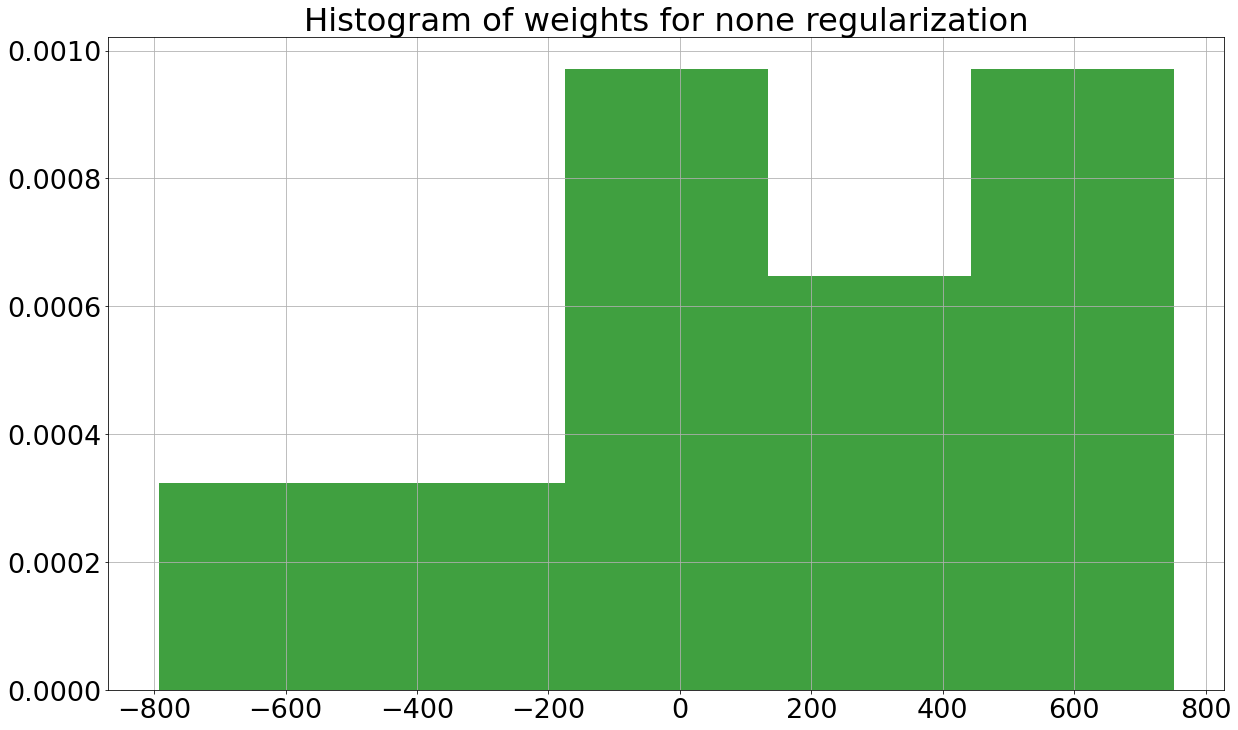

In [199]:
plt.rcParams['figure.figsize'] = 20, 12
plt.rcParams.update({'font.size': 27})
n, bins, patches = plt.hist(reg.coef_, 5, density=True, facecolor='g', alpha=0.75)


plt.xlabel('')
plt.title('Histogram of weights for none regularization')
plt.grid(True)
plt.show()

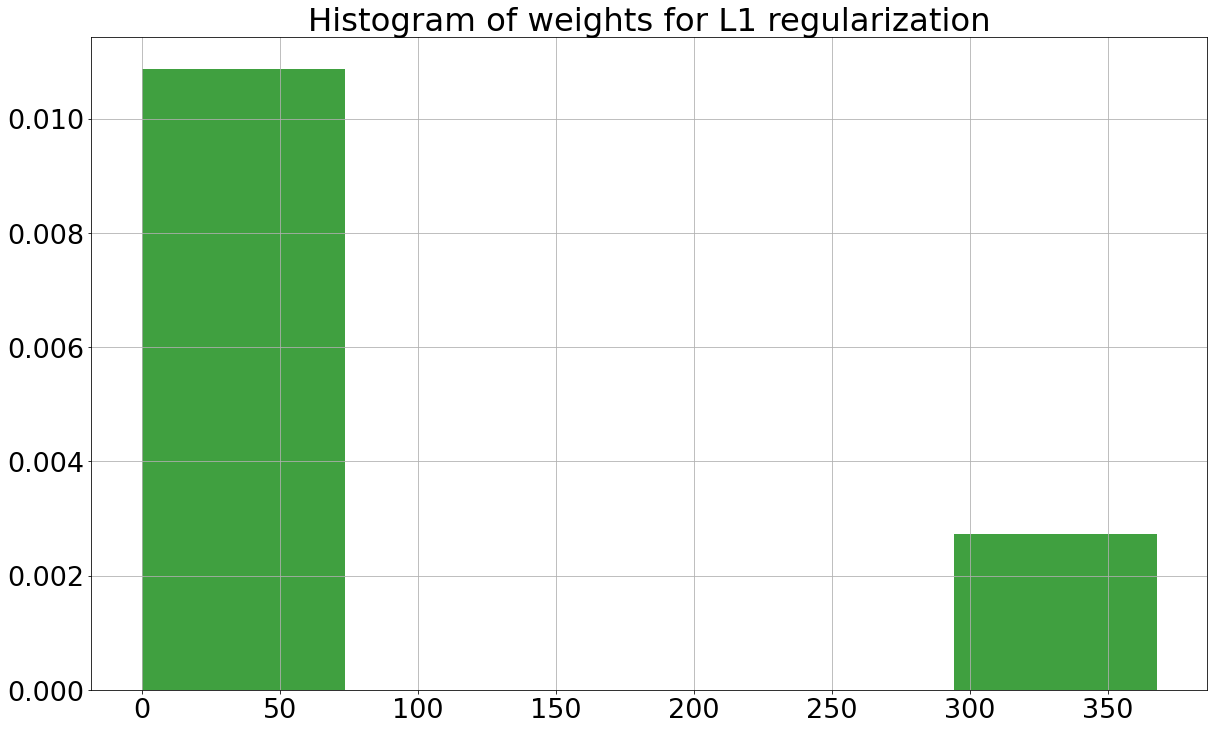

In [200]:
n, bins, patches = plt.hist(reg1.coef_, 5, density=True, facecolor='g', alpha=0.75)

plt.xlabel('')
plt.title('Histogram of weights for L1 regularization')
plt.grid(True)
plt.show()

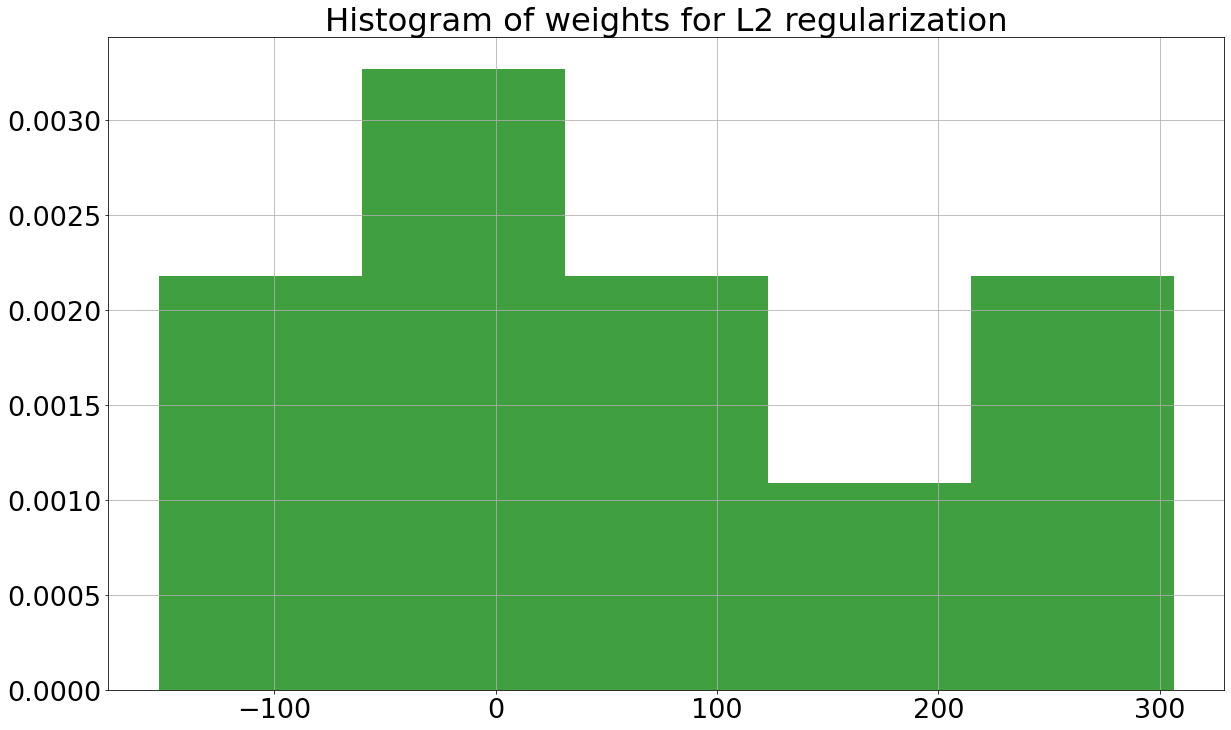

In [201]:
n, bins, patches = plt.hist(reg2.coef_, 5, density=True, facecolor='g', alpha=0.75)


plt.xlabel('')
plt.title('Histogram of weights for L2 regularization')
plt.grid(True)
plt.show()

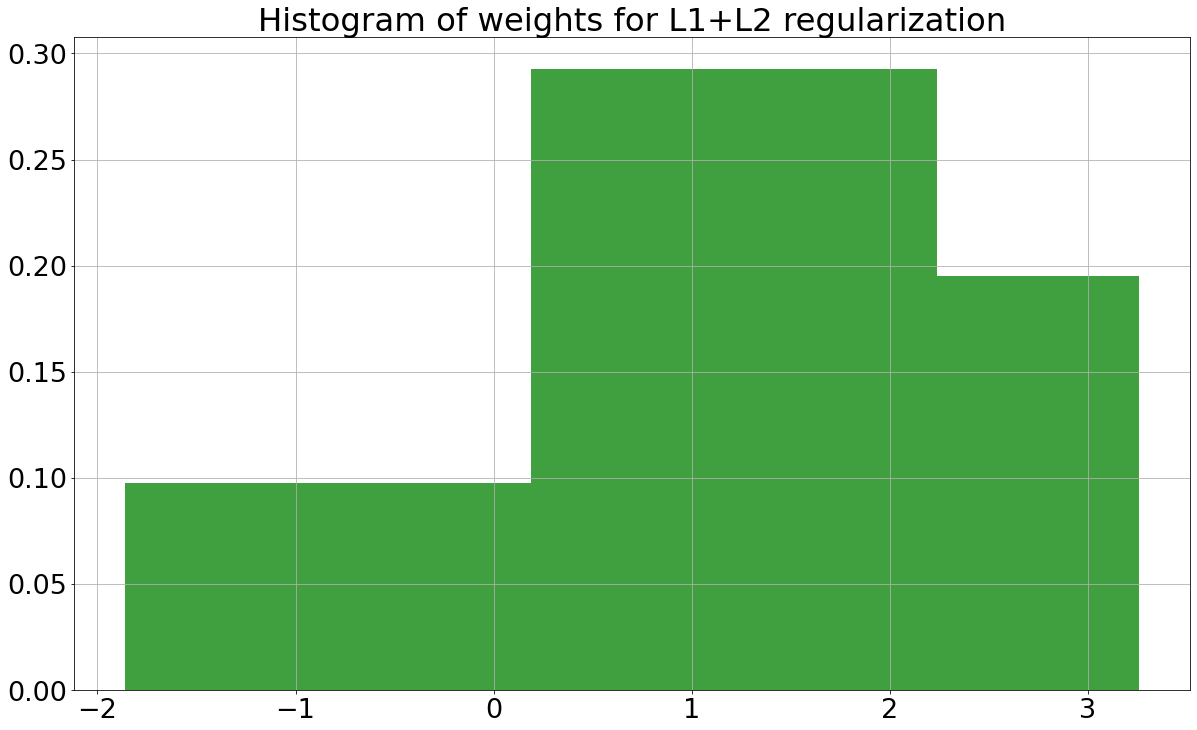

In [202]:
n, bins, patches = plt.hist(reg1_2.coef_, 5, density=True, facecolor='g', alpha=0.75)


plt.xlabel('')
plt.title('Histogram of weights for L1+L2 regularization')
plt.grid(True)
plt.show()

# Эмпирическая функция распределения параметров

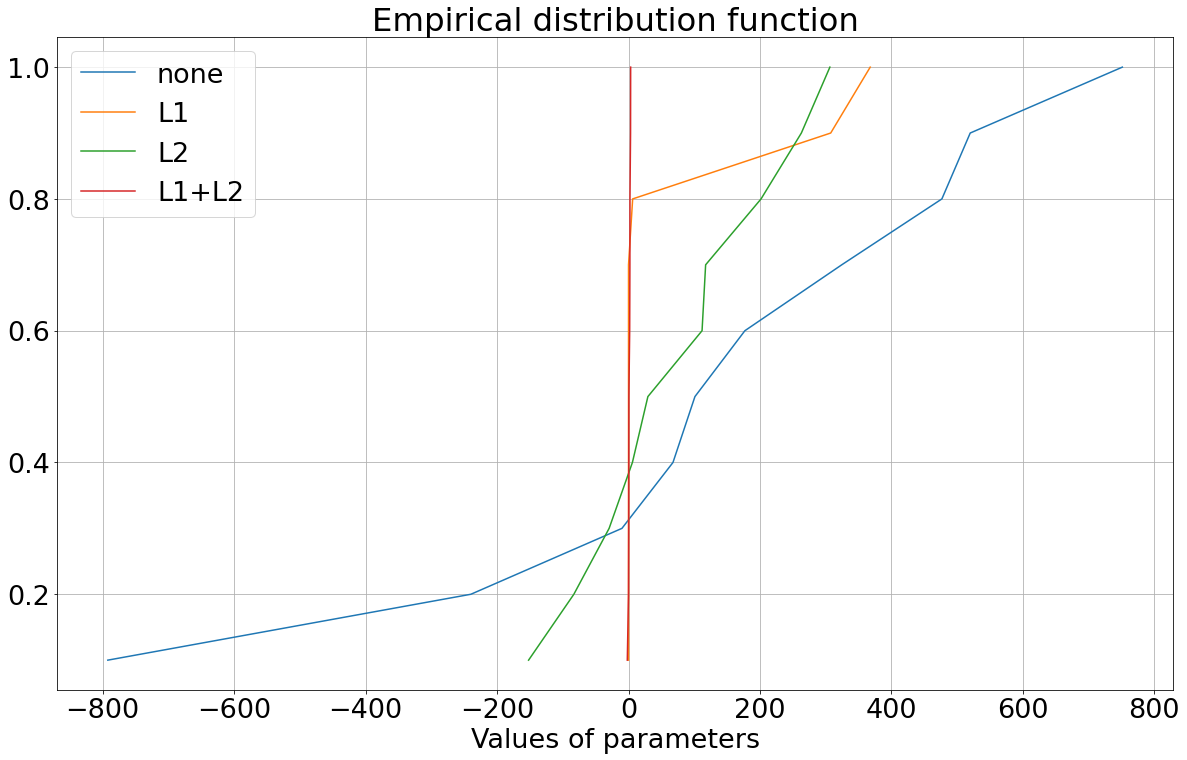

In [206]:
ecdf = ECDF(reg.coef_)
ecdf1 = ECDF(reg1.coef_)
ecdf2 = ECDF(reg2.coef_)
ecdf1_2 = ECDF(reg1_2.coef_)

plt.plot(ecdf.x, ecdf.y ,label = 'none')
plt.plot(ecdf1.x, ecdf1.y, label = 'L1')
plt.plot(ecdf2.x, ecdf2.y, label = 'L2')
plt.plot(ecdf1_2.x, ecdf1_2.y, label = 'L1+L2')
plt.title('Empirical distribution function')
plt.xlabel('Values of parameters')
plt.legend()
plt.grid()
plt.show()

Видим, что при любой регуляризации получаем веса распределенные ближе к 0. Как и должно быть из теории L2 распределение выглядит более гладко, чем L1.